## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [6]:
sample = df.sample(1000)["TotalPrice"]

print(f"모집단 평균: {df['TotalPrice'].mean()}")
print(f"표본 평균: {sample.mean()}")
print(f"모집단 표준편차: {df['TotalPrice'].std()}")
print(f"표본 표준편차: {sample.std()}")

print(f"표준편차 비율: {sample.std()/df['TotalPrice'].std()}")

모집단 평균: 17.98779487699964
표본 평균: 14.47932
모집단 표준편차: 378.8108235059747
표본 표준편차: 41.8778982650837
표준편차 비율: 0.11055095490011306


### 미션 1) 답변
: 모집단과 표본은 평균이 거의 차이가 나지 않으며, 표준편차의 경우 표본의 표준편차가 모집단에 비해 0.1의 비율만큼 작은 것을 알 수 있다.

이는 표본을 추출하는 과정에서 표본의 크기인 n에 반비례해서 작아진다.

이 부분에서  중심극한정리가 적용된다.
중심극한정리란 모집단에서 여러 번 반복하여 n개의 표본을 추출한 뒤, 그 표본들의 평균은 모집단의 평균에 수렴한다. 표준편차는 모집단의 표준편차를 샘플의 크기인 n의 제곱근으로 나눈 것으로 수렴한다.

이 때 표본의 크기가 커질 수록 표본 평균의 분포는 모집단의 분포와 별개로 정규분포를 따르게 된다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [7]:
from scipy import stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


In [8]:
df[['TotalPrice', 'Country']]

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom
...,...,...
541904,10.20,France
541905,12.60,France
541906,16.60,France
541907,16.60,France


In [9]:
top_countries = df.groupby("Country").sum("Quantity").sort_values("Quantity", ascending = False)["Quantity"].head(2).index

In [10]:
mean_country1 = df[df['Country'] == top_countries[0]]['TotalPrice'].mean()
mean_country2 = df[df['Country'] == top_countries[1]]['TotalPrice'].mean()

t_stat, p_value = stats.ttest_ind(df[df['Country'] == top_countries[0]]['TotalPrice'],
                             df[df['Country'] == top_countries[1]]['TotalPrice'],
                             equal_var=False)

print(f"국가 {top_countries[0]}의 'TotalPrice' 평균: {mean_country1}")
print(f"국가 {top_countries[1]}의 'TotalPrice' 평균: {mean_country2}")
print(f"t-통계량: {t_stat}, p-값: {p_value}")

국가 United Kingdom의 'TotalPrice' 평균: 16.525065419655366
국가 Netherlands의 'TotalPrice' 평균: 120.05969633066216
t-통계량: -30.271869389677317, p-값: 8.462075644260513e-172


#### 6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

1. t-통계량 : -30.27
- t통계량은 두 집간 사이의 평균 차이가 표준 오차에 비해 얼마나 큰지를 나타내는 값입니다. 이에 따라 위 값을 바탕으로 첫 번째 집단이 두 번째 집단에 비해 TotalPrice가 작다는 것을 의미하며, 절대값으로 30의 값을 지닌 것으로 보아 그 차이가 적지 않다는 것을 알 수 있습니다.

2. p-value : 8.462075644260513e-172
- p값이 굉장히 작은 것을 알 수 있습니다. 이는 귀무가설이 참일 때, t-통계량에 해당하는 수치가 나타날 확률을 의미합니다.
따라서 우리는 위 수치를 바탕으로 귀무가설을 기각할 수 있는 근거를 얻을 수 있으며, 통계적으로 유의미하다는 것을 알 수 있습니다.

3. 결과
- 두 국가 사이의 TotalPrice의 평균은 다르다는 것을 알 수 있습니다. 즉, 주문량이 많은 두 국가 사이의 TotalPrice값이 유의미한 차이를 보인다는 것을 알 수 있습니다.

4. 1종 오류, 2종 오류

  1) 1종 오류 : 귀무가설이 참인데, 기각되는 경우를 의미하며, 본 테스트에서는 두 국가 사이에 차이가 없음에도 차이가 있다고 잘못된 결론을 내리는 경우를 의미합니다. p-value 값이 충분히 적게 나왔음에도 귀무가설이 참인 경우를 의미합니다.

  2) 2종 오류 : 귀무가설이 거짓인데도 기각되지 않는 경우를 의미합니다. 본 테스트에서는 두 국가 사이의 차이가 있음에도 차이가 없다고 잘못된 결론을 내리는 경우를 의미합니다. p-valule 값이 귀무가설을 기각할 정도로 유의미하게 나오지 않아서 귀무가설을 채택하였으나, 두 국가 사이의 차이가 있으며, 서로 다른 집단인 경우를 의미합니다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [11]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

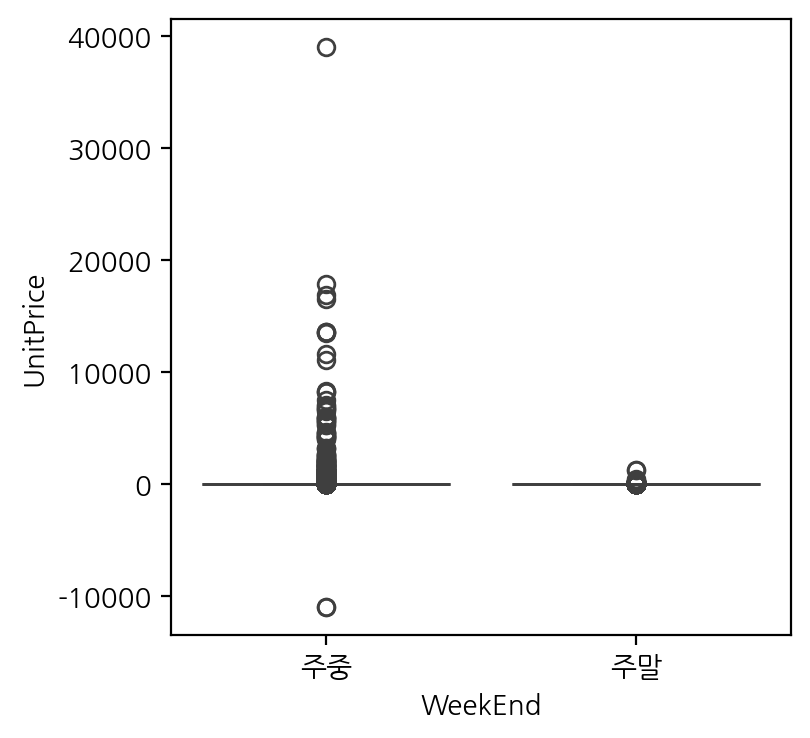

In [12]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df);

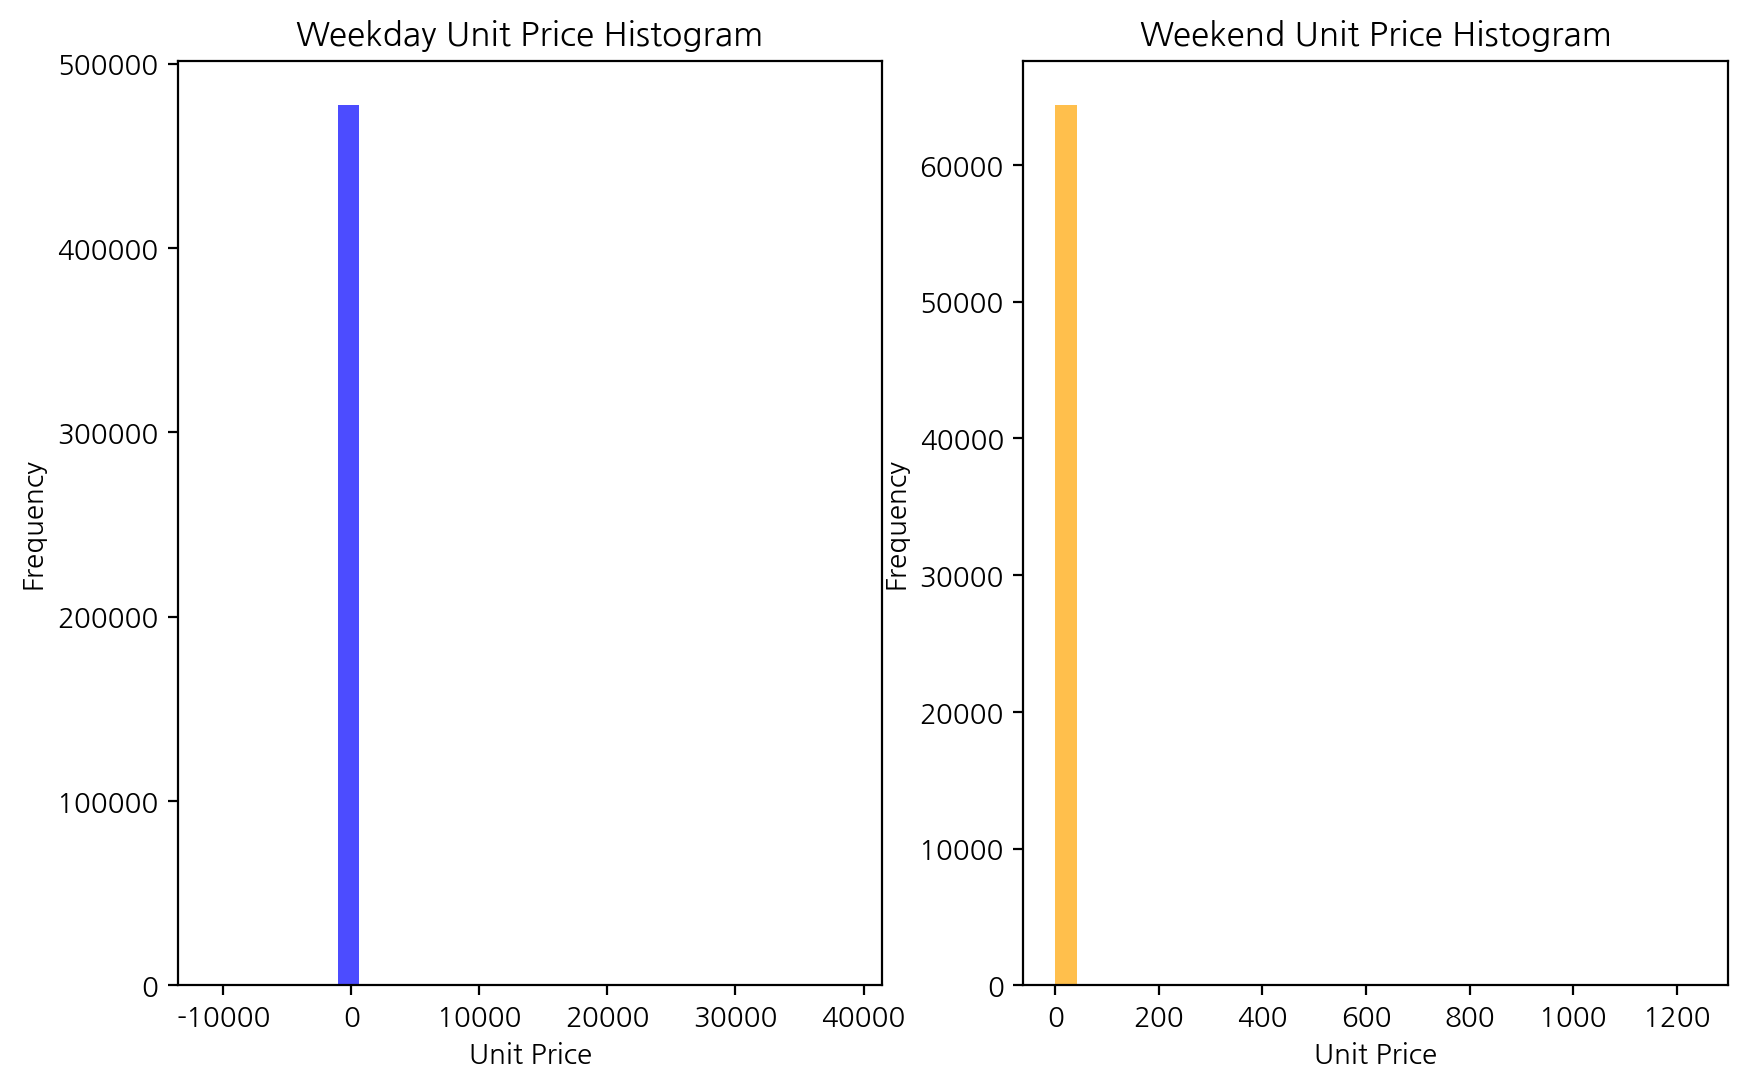

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(weekday_data['UnitPrice'], bins=30, color='blue', alpha=0.7)
plt.title('Weekday Unit Price Histogram')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(weekend_data['UnitPrice'], bins=30, color='orange', alpha=0.7)
plt.title('Weekend Unit Price Histogram')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.show()

In [14]:
weekday_stats = weekday_data['UnitPrice'].describe()
weekend_stats = weekend_data['UnitPrice'].describe()

print("주중(UnitPrice)의 기술통계:")
print(weekday_stats)
print("\n주말(UnitPrice)의 기술통계:")
print(weekend_stats)

주중(UnitPrice)의 기술통계:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

주말(UnitPrice)의 기술통계:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64


In [15]:
weekday_quantiles = weekday_data['UnitPrice'].quantile([0.25, 0.5, 0.75])
weekend_quantiles = weekend_data['UnitPrice'].quantile([0.25, 0.5, 0.75])

print("\n주중(UnitPrice)의 분위수:")
print(weekday_quantiles)
print("\n주말(UnitPrice)의 분위수:")
print(weekend_quantiles)


주중(UnitPrice)의 분위수:
0.25    1.25
0.50    2.10
0.75    4.13
Name: UnitPrice, dtype: float64

주말(UnitPrice)의 분위수:
0.25    1.25
0.50    1.85
0.75    3.75
Name: UnitPrice, dtype: float64


## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [16]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [17]:
target_value = 1000

# 맨-휘트니 U-검정
statistic, p_value = mannwhitneyu(df['TotalPrice'], [target_value], alternative='two-sided')

print(f'Mann-Whitney U-statistic: {statistic}')
print(f'P-value: {p_value}')

Mann-Whitney U-statistic: 388.5
P-value: 0.08369156929699904


위 검정의 결과를 바탕으로 알 수 있는 점은 유의 수준인 0.05의 수치를 넘어선 p-value입니다. 이는 TotalPrice의 중앙값이 특정 값과 크게 다르지 않다는 것을 의미합니다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [18]:
from scipy import stats

In [19]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
DayOfWeek           0
WeekEnd             0
dtype: int64

In [20]:
target = df["UnitPrice"]
confidence_interval = stats.t.interval(0.95, len(target)-1, loc=np.mean(target), scale=stats.sem(target))

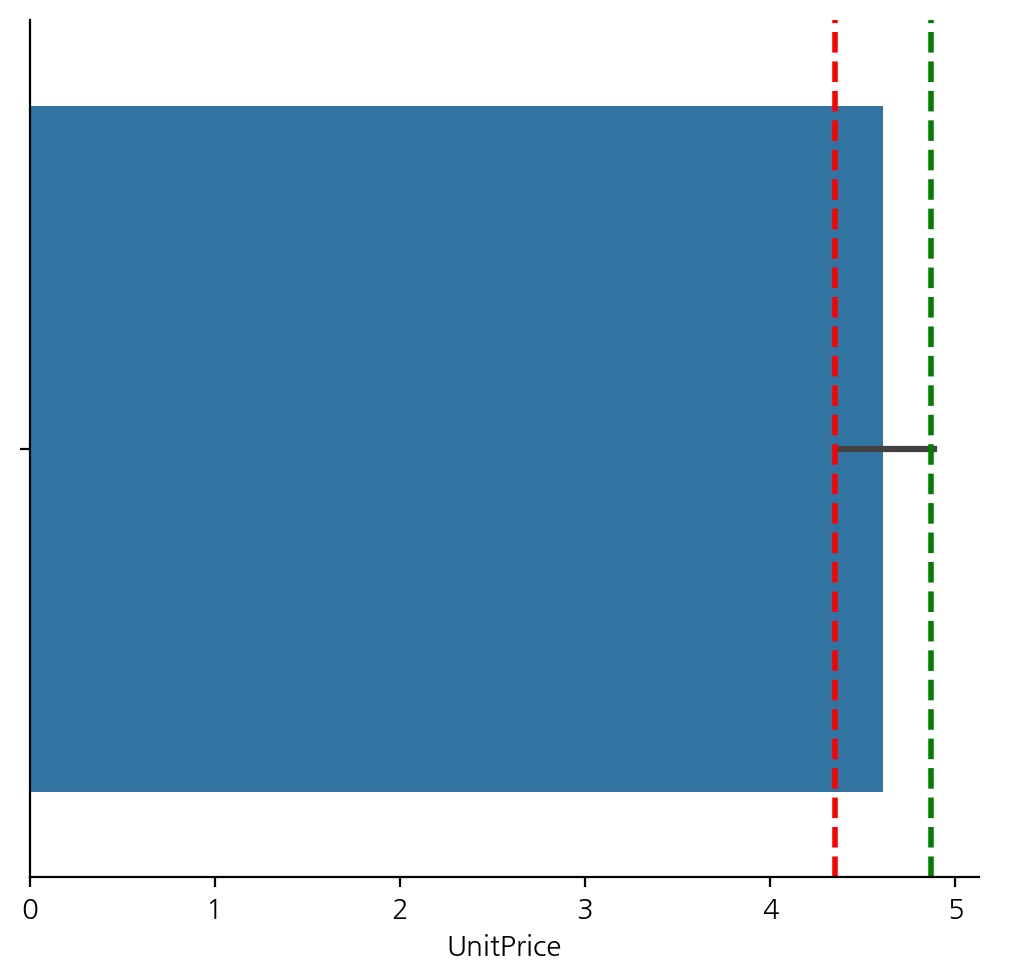

In [21]:
sns.catplot(x=target, kind="bar")
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound')

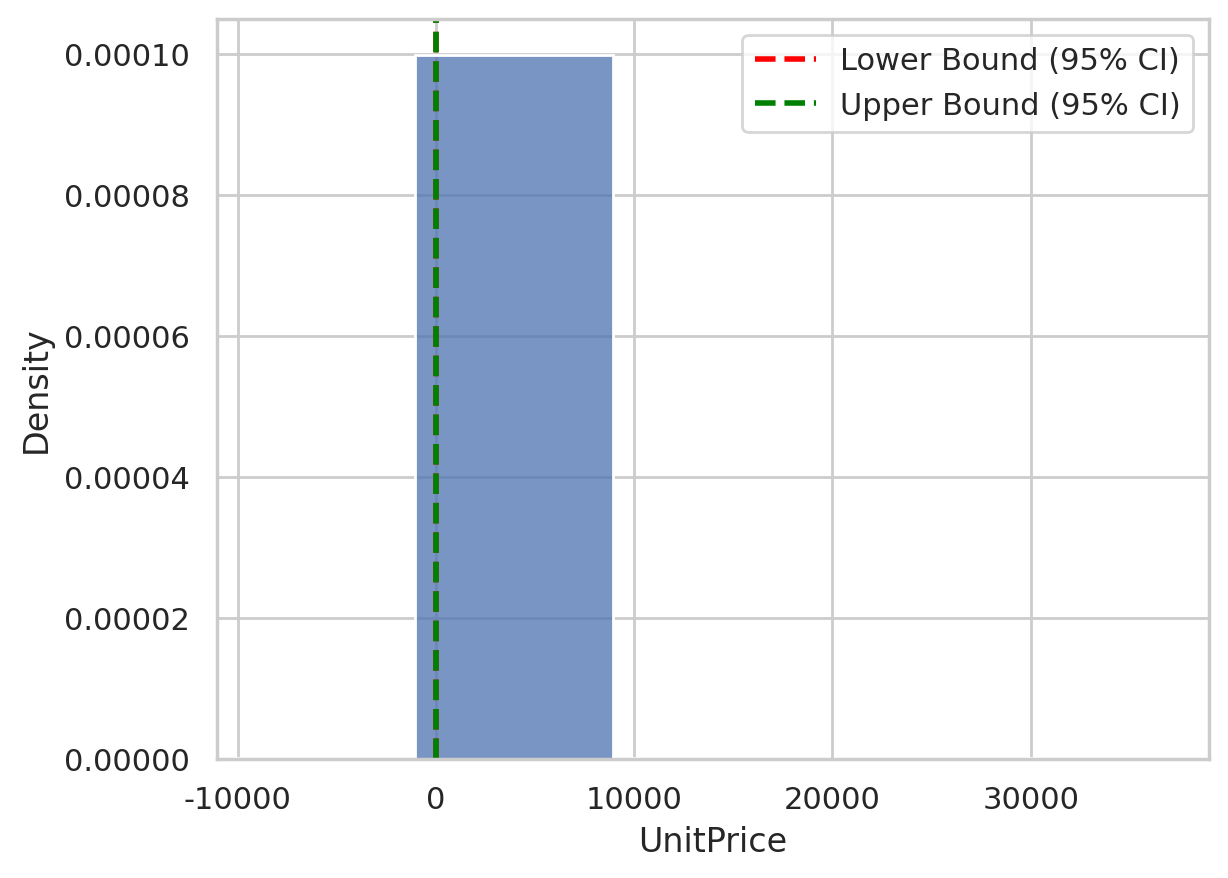

In [35]:
# 시각화
sns.histplot(data = target, stat='density', bins = 5)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')

plt.xlabel('UnitPrice')
plt.ylabel('Density')
plt.xlim(target.min(), target.max())
plt.legend()
plt.show()

In [25]:
target.max()

38970.0

In [26]:
target.min()

-11062.06

신뢰구간은 추정치가 어느 범위 내에 있을 지 가능성을 나타내는 척도로 예를 들어서 신뢰구간을 활용하여 불확실한 수익을 예측하기 위해 신뢰구간을 설정하고 이를 바탕으로 수익에 맞는 적절한 예산을 계획할 수 있습니다.

또한 제품의 생산량에 대한 신뢰구간을 고려하여 제품 재고 관리 최적화에 도움을 줄 수 있습니다.